<center><h1> ETI195 - Ética para Ciencia de Datos y Estadística </h1><center>
<center><h2> Taller Sumativo I: Análisis demográfico  <h2><center>    

## Instrucciones:

- La siguiente tarea es **individual**. 
- Cuenta con intentos ilimitados para el envío de su tarea.

## Import de librerías

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Descripción de los datos a utilizar


Este conjunto de datos clasifica a las personas descritas por un conjunto de atributos con buenos o malos riesgos crediticios.

In [2]:
df = pd.read_csv("german_risk.csv")
df.head()

,sex,age_cat,foreign_worker,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,marital_status,credit-risk
0,male,aged,yes,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,single,good
1,female,young,yes,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,...,real estate,22.0,none,own,1.0,skilled,1.0,none,div/dep/mar,bad
2,male,aged,yes,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,single,good
3,male,aged,yes,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,single,good
4,male,aged,yes,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,single,bad


In [3]:
df.columns

Index(['sex', 'age_cat', 'foreign_worker', 'checking_status', 'duration',
       'credit_history', 'purpose', 'credit_amount', 'savings_status',
       'employment', 'installment_commitment', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'marital_status', 'credit-risk'],
      dtype='object')

**Columnas Numéricas**

- `duration`: Duración en meses. Rango (4,72).
- `credit_amount`: Cantidad de crédito solicitada. Rango (250, 18424) en DM - Marco alemán.
- `installment_commitment`: Tasa de cuota en porcentaje del ingreso disponible. Rango (1,4).
- `residence_since`: Tiempo de residencia actual. Rango (1,4).
- `age`: Edad en años. Rango (19, 75).
- `existing_credits`: Número de créditos existentes en este banco. Rango (1,4) en DM - Marco alemán.
- `num_dependents`: Número de personas responsables de proveer el mantenimiento. Rango (1,2).

**Columnas Categóricas**

- `checking_status`: Valores `'0<=X<200', '<0', '>=200', 'no checking'`.
- `credit_history`: Historial crediticio del solicitante. Valores `['all paid', 'critical/other existing credit', 'delayed previously', 'existing paid', 'no credits/all paid']`.
- `purpose`: Motivo por el cual el solicitante solicitó un préstamo. Valores `['business', 'domestic appliance', 'education', 'furniture/equipment', 'new car', 'other', 'radio/tv', 'repairs', 'retraining', 'used car']`.
- `savings_status`: Cuenta de ahorros/bonos. Valores `['100<=X<500', '500<=X<1000', '<100', '>=1000', 'no known savings']`.
- `employment`: Empleo actual desde (en años). Valores `['1<=X<4', '4<=X<7', '<1', '>=7', 'unemployed']`.
- `other_parties`: Otros deudores / garantes. Valores `['co applicant', 'guarantor', 'none']`.
- `property_magnitude`: Bienes del solicitante. Valores `['car', 'life insurance', 'no known property', 'real estate']`.
- `other_payment_plans`: Otros planes de pago a plazos. Valores `['bank', 'none', 'stores']`.
- `housing`: Situación de vivienda del solicitante. Valores `['for free', 'own', 'rent']`.
- `job`: Categorías de empleo definidas por el banco. Valores `['high qualif/self emp/mgmt', 'skilled', 'unemp/unskilled non res', 'unskilled resident']`.
- `own_telephone`: Si hay un teléfono registrado a nombre del cliente. Valores `['none', 'yes']`.
- `foreign_worker`: Variable protegida. Valores `['no', 'yes']`.
- `sex`: Variable protegida. Valores `['female', 'male']`.
- `marital_status`: Estado personal. Valores `['div/dep/mar', 'div/sep', 'mar/wid', 'single']`.

**Etiqueta (variable objetivo)**

- `credit-risk`: `'good'` (favorable) o `'bad'` (desfavorable).

## **Pregunta 1**: ¿Qué atributos demográficos puedes identificar? ¿Cómo son las distribuciones de estas variables?

Se deja a continuación un ejemplo de respuesta con un atributo; la idea es que después se analice el resto de atributos de manera análoga.	

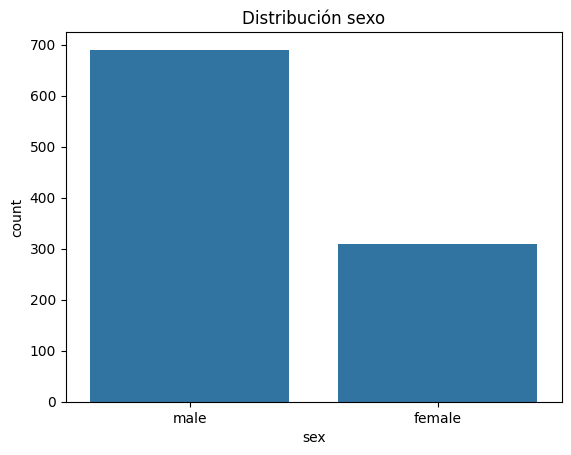

In [4]:
sns.countplot(data=df, x="sex")
plt.title("Distribución sexo")
plt.show()

In [5]:
df["sex"].value_counts(normalize=True) * 100

sex
male      69.0
female    31.0
Name: proportion, dtype: float64

En este caso, podemos ver que los hombres se encuentran sobrerepresentados en los datos, siendo más del doble que las mujeres. Esto significa un desbalanceo importante de nuestros datos, y podría afectar nuestros modelos.

## **Pregunta 2**: ¿Qué subpoblaciones interseccionales puedes identificar? Revisa su representación respecto del total de los datos.

## **Pregunta 3**: Revisa la distribución de algunos de los atributos dentro de las subpoblaciones.

Se deja a continuación una idea de lo que se puede hacer en código. 

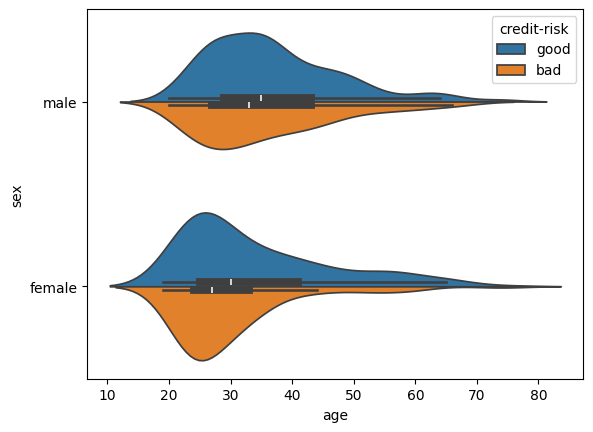

In [6]:
sns.violinplot(y="sex", x="age", hue="credit-risk", split=True, data=df)
plt.show()

##  **Pregunta 4**: ¿Cómo distribuye la variable objetivo (credit-risk) dentro de las subpoblaciones? ¿Qué problemas identificas?

## **Pregunta 5**: Reflexiona acerca de las consecuencias que podría tener implementar un algoritmo que participe en el proceso de decisión de un banco en la asignación de créditos.